In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_digits


***Simple regularization demo***

Noisy target: parabola + noise

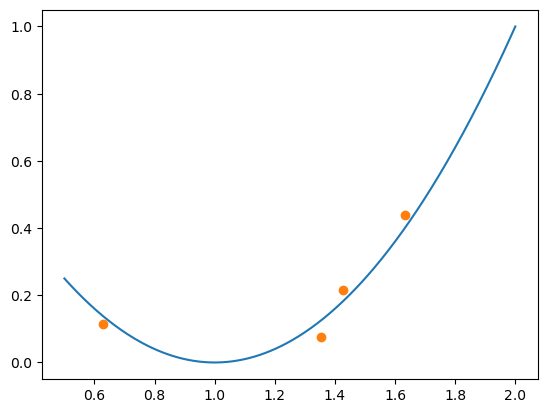

In [3]:
x_low = 0.5
x_high = 2.0

def noiseless(x_val):
  return (x_val-1)**2

def getTarget(x_val):
  y_val = noiseless(x_val) + np.random.normal(0,0.05)
  return y_val

N = 4
x_vals = np.sort(np.random.uniform(x_low, x_high, N))
y_vals = np.array([getTarget(x) for x in x_vals])

noiselessCount = 500
x_noiseless = np.linspace(x_low, x_high, noiselessCount)
y_noiseless = noiseless(x_noiseless)

plt.plot(x_noiseless, y_noiseless)
plt.plot(x_vals, y_vals, 'o')




Let us try to fit a 4th order polynomial to this

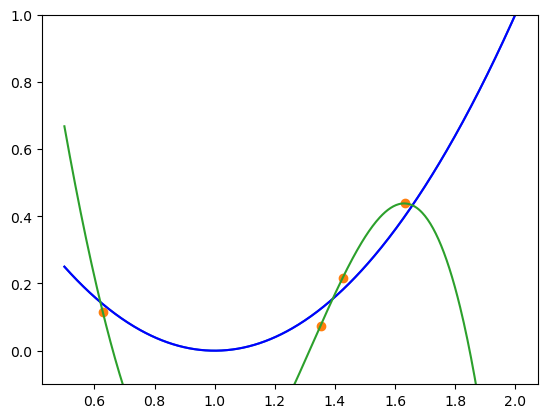

In [4]:
x_train = x_vals.reshape(-1,1)
poly = PolynomialFeatures(4,include_bias = False)
x_train_hd = poly.fit_transform(x_train)

reg = linear_model.LinearRegression()
fitted = reg.fit(x_train_hd,y_vals)

plt.plot(x_noiseless, y_noiseless)
w = reg.coef_#.reshape(4,1)

y_model =  poly.fit_transform(x_noiseless.reshape(-1,1)).dot(w) + reg.intercept_
plt.ylim(-0.1,1)
plt.plot(x_noiseless, y_noiseless, 'blue')
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_noiseless, y_model)

Retrain with regularizer and lambda = 0.001

C:\Users\Rujul\AppData\Local\Temp\ipykernel_11016\3191993560.py:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0,1,1)
C:\Users\Rujul\AppData\Local\Temp\ipykernel_11016\3191993560.py:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0,1,1)


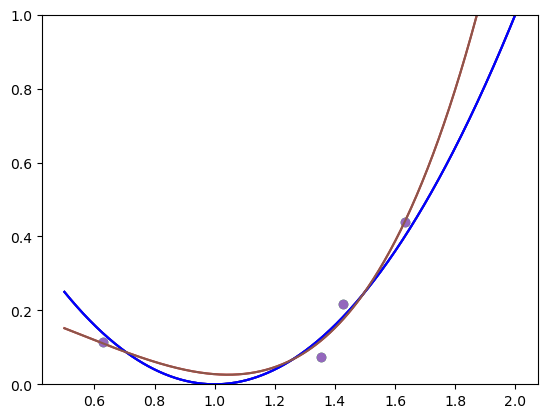

In [7]:
reg = linear_model.Ridge(alpha=0.001)
fitted = reg.fit(x_train_hd,y_vals)

plt.plot(x_noiseless, y_noiseless)
w = reg.coef_#.reshape(4,1)

y_model =  poly.fit_transform(x_noiseless.reshape(-1,1)).dot(w) + reg.intercept_
plt.ylim(-0,1,1)
reg = linear_model.Ridge(alpha=0.01)
fitted = reg.fit(x_train_hd,y_vals)

plt.plot(x_noiseless, y_noiseless)
w = reg.coef_#.reshape(4,1)

y_model =  poly.fit_transform(x_noiseless.reshape(-1,1)).dot(w) + reg.intercept_
plt.ylim(-0,1,1)
plt.plot(x_noiseless, y_noiseless, 'blue')
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_noiseless, y_model)
plt.plot(x_noiseless, y_noiseless, 'blue')
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_noiseless, y_model)

Retrain with regularizer and lambda = 0.01

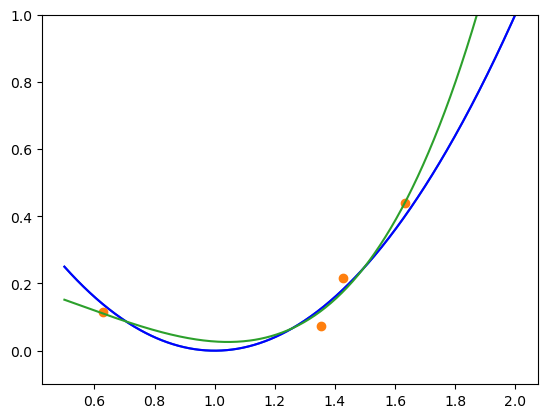

In [8]:
reg = linear_model.Ridge(alpha=0.01)
fitted = reg.fit(x_train_hd,y_vals)

plt.plot(x_noiseless, y_noiseless)
w = reg.coef_#.reshape(4,1)

y_model =  poly.fit_transform(x_noiseless.reshape(-1,1)).dot(w) + reg.intercept_
plt.ylim(-0.1,1)
plt.plot(x_noiseless, y_noiseless, 'blue')
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_noiseless, y_model)

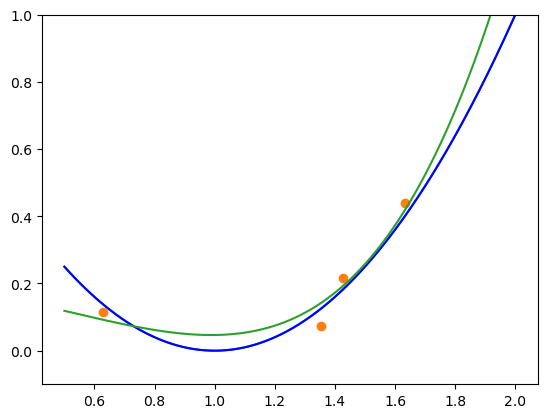

In [9]:
reg = linear_model.Ridge(alpha=0.1)
fitted = reg.fit(x_train_hd,y_vals)

plt.plot(x_noiseless, y_noiseless)
w = reg.coef_#.reshape(4,1)

y_model =  poly.fit_transform(x_noiseless.reshape(-1,1)).dot(w) + reg.intercept_
plt.ylim(-0.1,1)
plt.plot(x_noiseless, y_noiseless, 'blue')
plt.plot(x_vals, y_vals, 'o')
plt.plot(x_noiseless, y_model)

Why model selection makes validation estimate dirty?

See this analogy

Let c and d be two coins with bias 0.5 each


0.499257


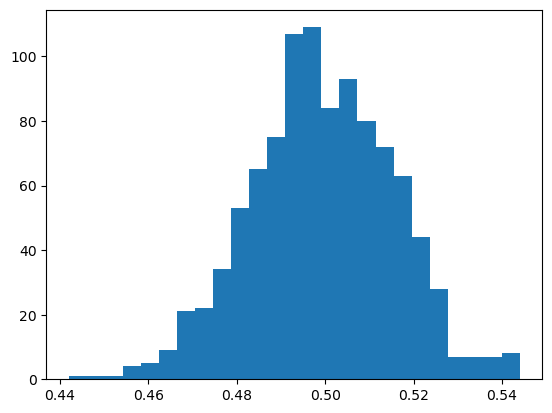

In [10]:
def tossOnce(p):
  return np.random.binomial(1,p)

def estimateOnce(p,trials = 1000):
  runs = np.zeros(trials)
  for i in range(trials):
    runs[i]= tossOnce(p)
  return sum(runs)/trials

def estimateSeveralTimes(p, reps = 1000, trialPerRep = 1000):
  estimateVals = np.zeros(reps)
  for i in range(reps):
    estimateVals[i] = estimateOnce(p,trialPerRep)
  return estimateVals

# two coins with same bias
pc = 0.5
pd = 0.5

# let us see how estimation works on them
cest = estimateSeveralTimes(pc)


plt.hist(cest,bins=25)
print(np.average(cest))




Estimate for the other coin

0.500696


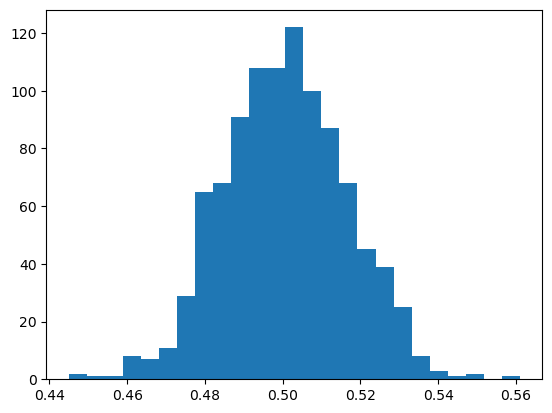

In [11]:
dest = estimateSeveralTimes(pd)
plt.hist(dest,bins=25)
print(np.average(dest))

Now let us simulate the validation situation by selecting **one** of the two coins based on **performance**

0.49115


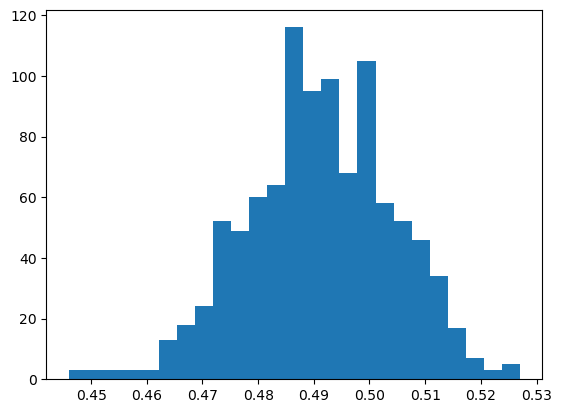

In [12]:
def chooseBest(pc,pd,reps = 1000, trialPerRep = 1000):
  bestCoin = np.zeros(reps)
  for i in range(reps):
    coinC = estimateOnce(pc, trialPerRep)
    coinD = estimateOnce(pd, trialPerRep)
    if coinC < coinD:
      bestCoin[i] = coinC
    else:
      bestCoin[i] = coinD
  return bestCoin

valCoin = chooseBest(pc,pd)
plt.hist(valCoin,bins=25)
print(np.average(valCoin))

Study the role of
1.   Reps
2.   trialsPerRep


**Load the digits database**

<Figure size 640x480 with 0 Axes>

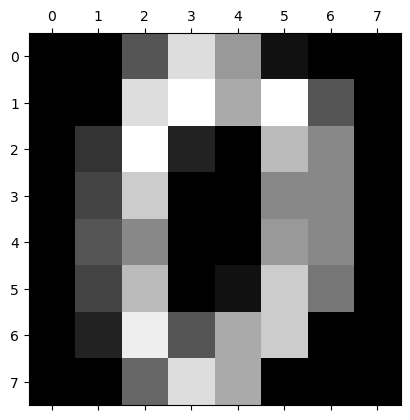

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()

train_X = digits.data
train_y = digits.target

x_train = train_X[ np.logical_or(train_y==1 , train_y==5)]
y_train = train_y[ np.logical_or(train_y==1 , train_y==5)]

x_train = x_train[0:500]
y_train = y_train[0:500]

x_test = train_X[ np.logical_or(train_y==1 , train_y==5)]
y_test = train_y[ np.logical_or(train_y==1 , train_y==5)]

x_test = x_test[500:]
y_test = y_test[500:]

plt.gray()
plt.matshow(digits.images[0])
plt.show()




Create new features for classification training

In [25]:
x_new = np.zeros((len(y_train),2))

for i in range(len(y_train)):
    x_curr = x_train[i]
    intensity = np.average(x_curr)
    x_orig = x_curr.reshape(8,8)
    x_flip = np.fliplr(x_curr.reshape((8,8)))
    x_flip2 = np.flipud(x_curr.reshape((8,8)))
    symmetry = np.average(np.abs(x_orig-x_flip)+ np.abs(x_orig-x_flip2))/2
    x_new[i][0]=intensity
    x_new[i][1] = symmetry



Visualize a sample of datapoints

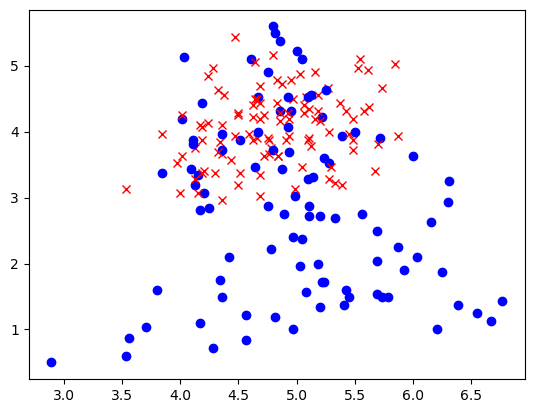

In [26]:
for i in range(len(y_train)):
    if np.random.uniform()<0.5:
        continue
    if(y_train[i]==1):
        plt.plot(x_new[i][0],x_new[i][1],'ob')
    else:
        plt.plot(x_new[i][0],x_new[i][1],'xr')

degree = 5
poly = PolynomialFeatures(degree,include_bias = False)
x_train_hd = poly.fit_transform(x_new)

reg = linear_model.LinearRegression()
fitted = reg.fit(x_train_hd,y_train)


Train the model on the high dimensional feature space

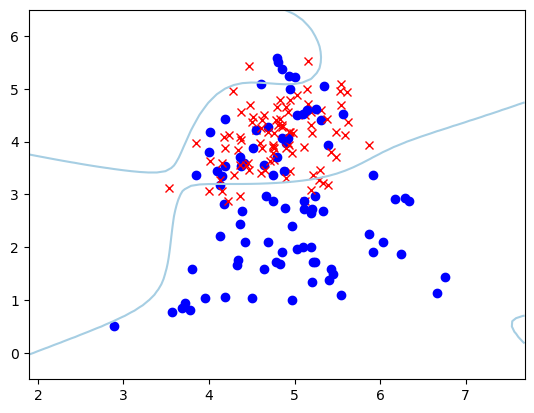

In [27]:

h = .1  # step size in the mesh
x_min, x_max = x_new[:, 0].min() - 1, x_new[:, 0].max() + 1
y_min, y_max = x_new[:, 1].min() - 1, x_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


@np.vectorize
def func(x,y,reg):
    poly = PolynomialFeatures(degree,include_bias = False)
    x_val = np.array([x,y])
    w = reg.coef_
    Z =  poly.fit_transform(x_val.reshape(1, -1)).dot(w) + reg.intercept_
    return Z

for i in range(len(y_train)):
    if np.random.uniform()<0.5:
        continue
    if(y_train[i]==1):
        plt.plot(x_new[i][0],x_new[i][1],'ob')
    else:
        plt.plot(x_new[i][0],x_new[i][1],'xr')


Z = func(xx, yy, reg)
plt.contour(xx, yy, Z, levels=[3],cmap=plt.cm.Paired)